# PROCEDURES
9.4 Introduction to Seaborn - [github link](https://github.com/zephyrowwa/Module-9-Data-Visualization-using-Pandas-Matplotlib-and-Seaborn/tree/main/9.4)

9.5 Formatting Plots - [github link](https://github.com/zephyrowwa/Module-9-Data-Visualization-using-Pandas-Matplotlib-and-Seaborn/tree/main/9.5)

9.6 Customizing Visualizations - [github link](https://github.com/zephyrowwa/Module-9-Data-Visualization-using-Pandas-Matplotlib-and-Seaborn/tree/main/9.6)

# SUPPLEMENTARY ACTIVITIES

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

quakes = pd.read_csv('/content/earthquakes-1.csv')
fb = pd.read_csv('/content/fb_stock_prices_2018.csv')

In [281]:
quakes

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


In [282]:
fb

,date,open,high,low,close,volume
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...,...
246,2018-12-24,123.10,129.74,123.0200,124.06,22066002
247,2018-12-26,126.00,134.24,125.8900,134.18,39723370
248,2018-12-27,132.44,134.99,129.6700,134.52,31202509
249,2018-12-28,135.34,135.92,132.2000,133.20,22627569


In [283]:
fb.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

# Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

<Axes: >

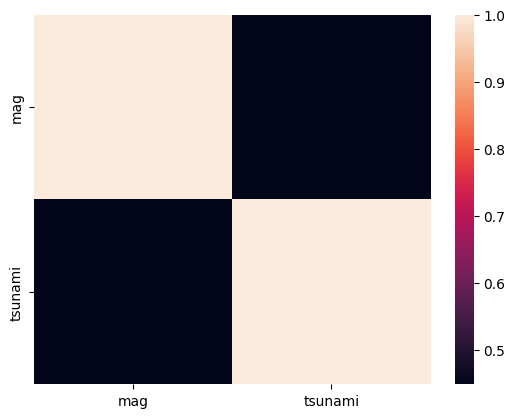

In [284]:
qkf = quakes.query('magType == "mb"')[['mag','tsunami']]
corqkf = qkf.corr()
sns.heatmap(corqkf)

# Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

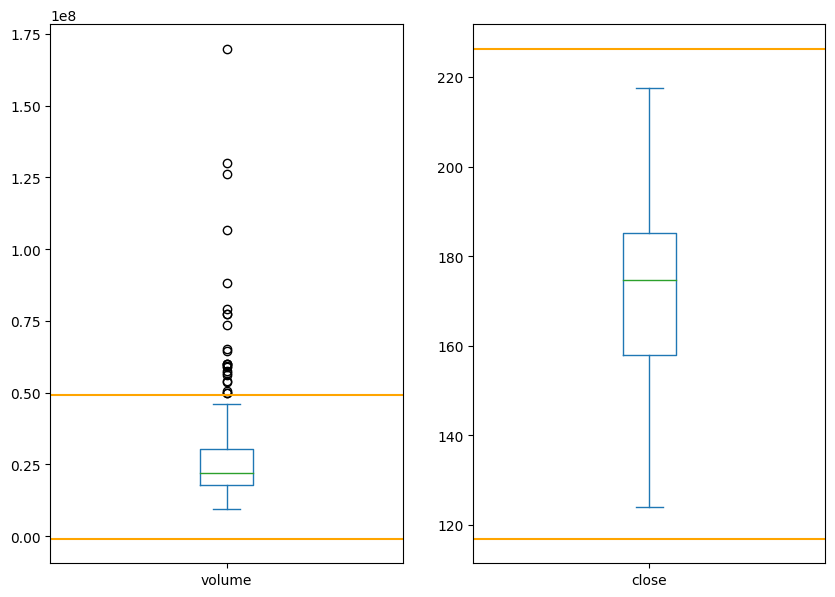

In [285]:
colm = ['volume','close']
subset = fb[colm]
qtiles = subset.quantile([0.25,0.75])
qtiles.loc['iqr',:] = qtiles.loc[0.75,:]-qtiles.loc[0.25,:]

axs = subset.plot(kind='box', subplots=True, figsize=(10,7))

for ax, col in zip(axs, colm):
  stats = qtiles[col]
  u = stats.loc[0.25]- 1.5 * stats['iqr']
  l = stats.loc[0.75]+ 1.5 * stats['iqr']
  for bound, name in zip([l,u],['lower','upper']):
    ax.axhline(bound, color='orange')

# Fill in the area between the bounds in the plot from exercise #2

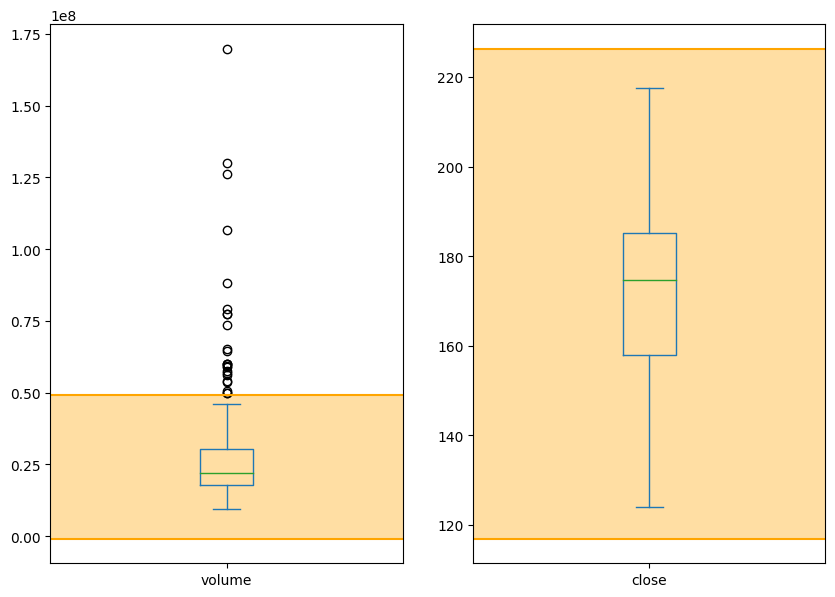

In [302]:
colm = ['volume','close']
subset = fb[colm]
qtiles = subset.quantile([0.25,0.75])
qtiles.loc['iqr',:] = qtiles.loc[0.75,:]-qtiles.loc[0.25,:]

axs = subset.plot(kind='box', subplots=True, figsize=(10,7))

for ax, col in zip(axs, colm):
  stats = qtiles[col]
  u = stats.loc[0.25]- 1.5 * stats['iqr']
  l = stats.loc[0.75]+ 1.5 * stats['iqr']
  for bound, name in zip([l,u],['lower','upper']):
    ax.axhline(bound, color='orange')
    ax.axhspan(l,u,facecolor='orange',alpha=0.2)

# Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

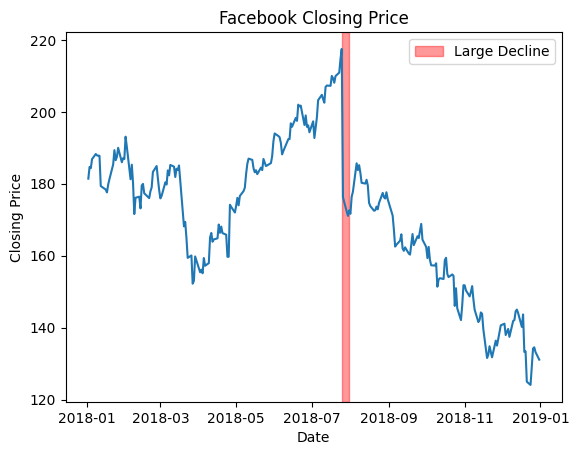

In [286]:
fb['date'] = pd.to_datetime(fb['date'])
fb.set_index('date', inplace=True)

plt.plot(fb['close'])

plt.axvspan('2018-07-25', '2018-07-31', alpha=0.4, color='red', label='Large Decline')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Facebook Closing Price')
plt.legend()

plt.show()

# Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
- Disappointing user growth announced after close on July 25, 2018
- Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
- FTC launches investigation on March 20, 2018

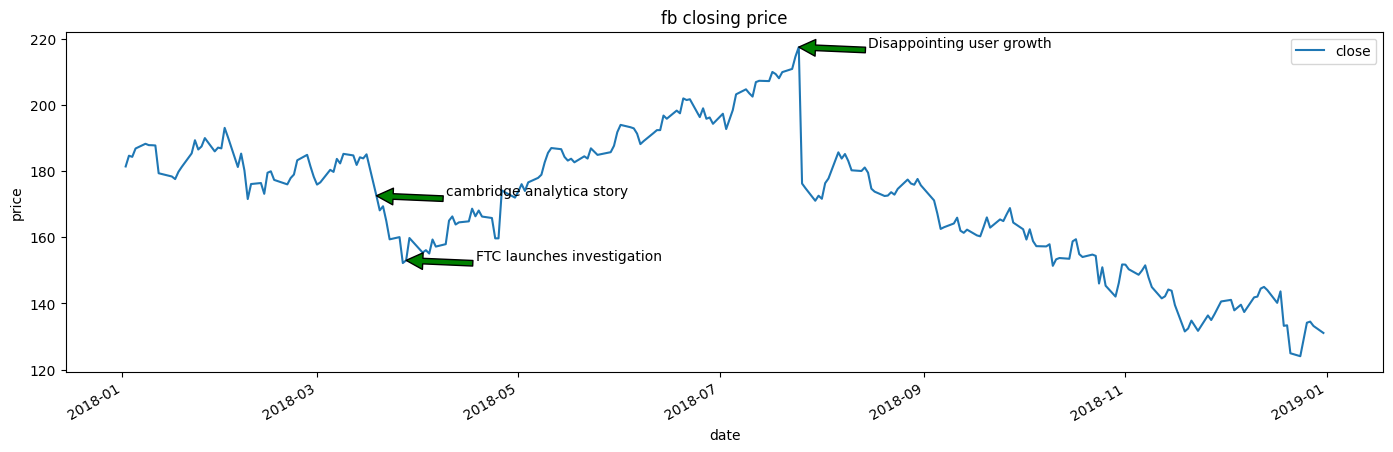

In [287]:
fb_close = fb.plot(kind='line', y='close',
                  figsize=(17,5), title='fb closing price',
                  ylabel='price')

dates = ['2018-07-25', '2018-03-19', '2018-03-28']
events = ['Disappointing user growth', 'cambridge analytica story', 'FTC launches investigation']

valid_dates = [date for date in dates if date in fb.index]

if len(valid_dates) != len(dates):
  print(f"Warning: Not all dates found in dataframe. Using only valid dates: {valid_dates}")

prices = []
for date in valid_dates:
    prices.append(fb.loc[date, 'close'])

for (date, price, name) in zip(valid_dates, prices, events):

    fb_close.annotate(name, xy=(date, price),
                                 xytext=(50,0),
                                 textcoords="offset points",
                                 arrowprops=dict(facecolor="green"))

# Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [288]:
all_cmaps = plt.colormaps()
qualitative_cmaps = [cmap for cmap in all_cmaps if cmap.startswith('tab') or cmap.startswith('Set') or cmap.startswith('Pastel')]

print(qualitative_cmaps)

['Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'Pastel1_r', 'Pastel2_r', 'Set1_r', 'Set2_r', 'Set3_r', 'tab10_r', 'tab20_r', 'tab20b_r', 'tab20c_r']


In [289]:
import itertools
import random

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


def reg_resid_plots(data):
    """
    Using seaborn, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns
    in the data, using a randomly chosen matplotlib colormap.

    Parameters:
        - data: A pandas DataFrame

    Returns:
        A matplotlib Figure object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    # Get a list of all registered colormaps
    ql_cmaps = qualitative_cmaps

    for (x, y), axes in zip(
        itertools.permutations(data.columns, 2),
        ax,
    ):
        # Randomly choose a colormap name
        cmap_name = random.choice(ql_cmaps)

        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=cm.get_cmap(cmap_name)(0.5))  # Use color at center

    plt.close()
    return fig

In [290]:
# 4 testing (from 9.4)

fb_reg_data = fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).iloc[:,-2:]

<ipython-input-289-a0bea59fc2f4>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  func(x=x, y=y, data=data, ax=subplot, color=cm.get_cmap(cmap_name)(0.5))  # Use color at center


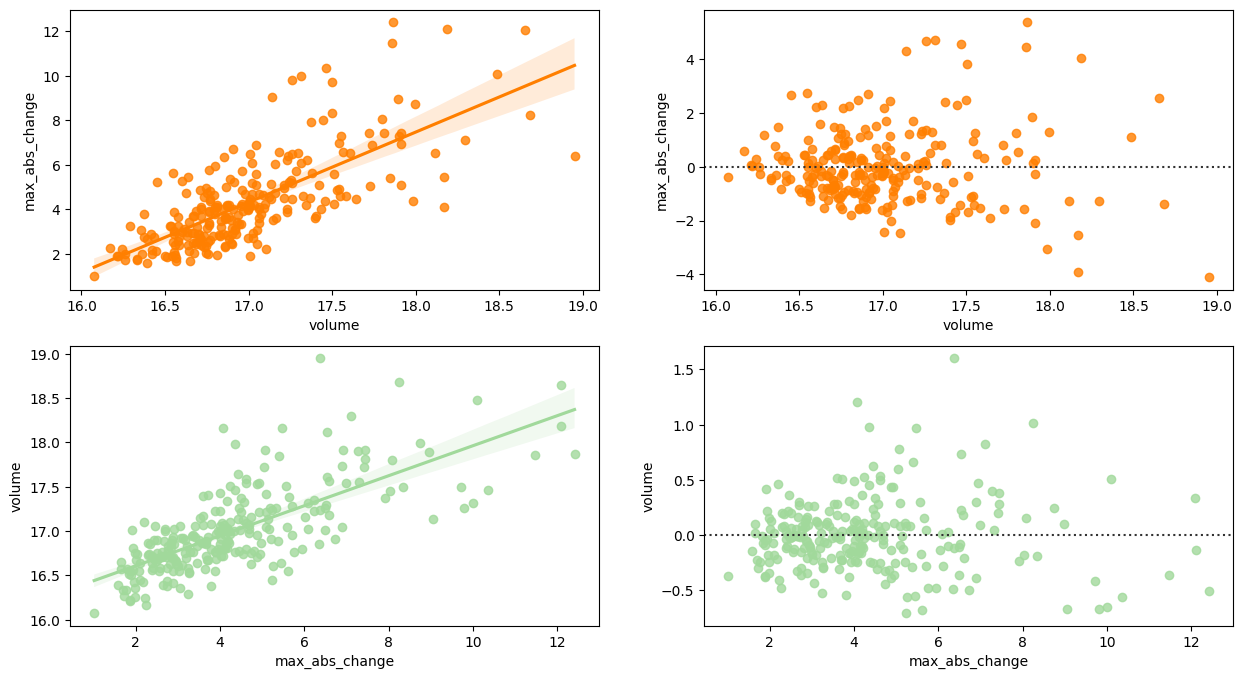

In [300]:
reg_resid_plots(fb_reg_data)

<ipython-input-289-a0bea59fc2f4>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  func(x=x, y=y, data=data, ax=subplot, color=cm.get_cmap(cmap_name)(0.5))  # Use color at center


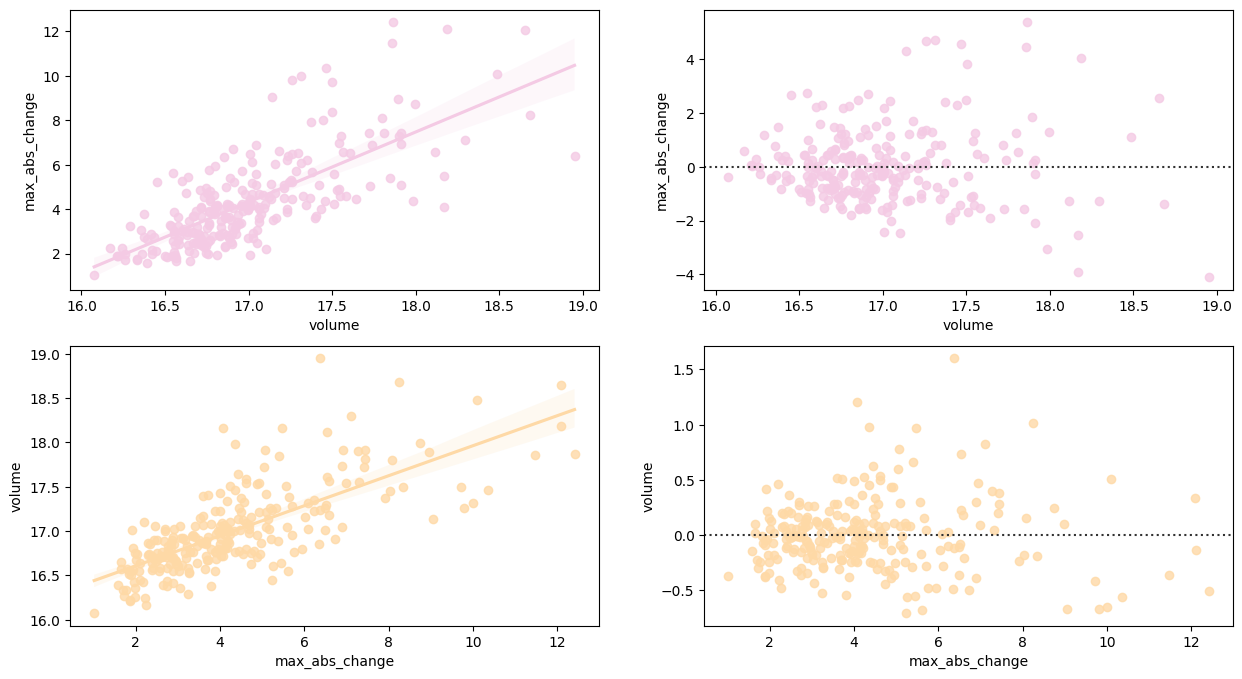

In [296]:
reg_resid_plots(fb_reg_data)

<ipython-input-289-a0bea59fc2f4>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  func(x=x, y=y, data=data, ax=subplot, color=cm.get_cmap(cmap_name)(0.5))  # Use color at center


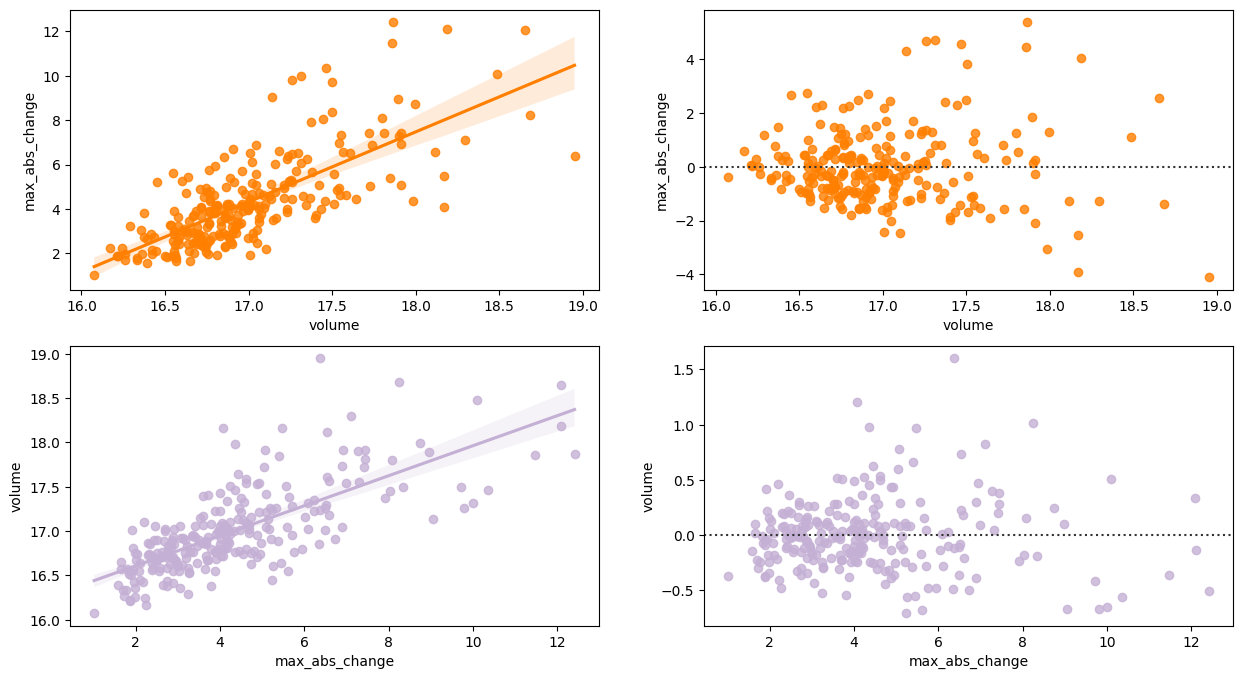

In [295]:
reg_resid_plots(fb_reg_data)